In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

mpl.rcParams['font.size'] = 16

seed = 1

### data1. toy-data

In [2]:
from kerasy.utils import generateWholeCakes

In [3]:
N = 200
K = 3
r_low, r_high = 2,5
rmin,rmax = -r_high, r_high
epochs = 500

In [4]:
X,Y = np.meshgrid(np.linspace(rmin,rmax,100), np.linspace(rmin,rmax,100))
XY = np.c_[X.ravel(),Y.ravel()]

In [5]:
# Original generated Data.
train_x_ori, train_y_ori = generateWholeCakes(
    K*2, N*2, r_low=r_low, r_high=r_high, seed=seed, same=False, noise_scale=2
)
mask = (train_y_ori%2)==0
train_x = train_x_ori[mask]; train_y = train_y_ori[mask]

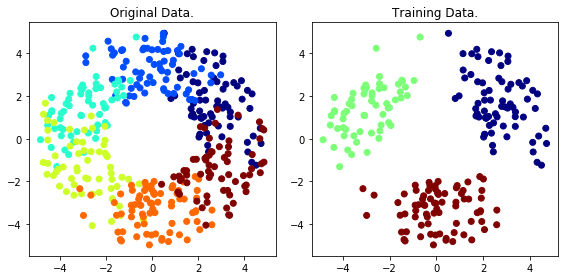

In [6]:
fig, (ax_ori,ax_used) = plt.subplots(1,2,figsize=(8,4))
ax_ori.set_title("Original Data."), ax_used.set_title("Training Data.")
ax_ori.scatter(train_x_ori[:,0], train_x_ori[:,1], c=train_y_ori, cmap="jet")
ax_used.scatter(train_x[:,0], train_x[:,1], c=train_y, cmap="jet")
plt.tight_layout()
plt.show()

In [7]:
def plot_result(X, labels, model=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(4,4))
    ax.scatter(X[:,0], X[:,1], c=labels, cmap="tab10")
    
    if ax is None:
        # Training Data.
        ax.set_title(f"Training Data.", fontsize=20)
        ax.set_xlabel("$x_1$"), ax.set_ylabel("$x_2$")       
    else:        
        # Train Result
        mn = model.__class__.__name__    
        ax.set_title(f"{mn} result", fontsize=20)
        ax.set_xlabel("$x_{" + mn + "1}$"), ax.set_ylabel("$x_{" + mn + "2}$")
    return ax

#### UMAP

In [8]:
from kerasy.ML.decomposition import UMAP

model_umap = UMAP(
    min_dist=0.1, 
    spread=1.0, 
    sigma_iter=40, 
    sigma_init=1.0, 
    sigma_tol=1e-5,
    sigma_lower=0, 
    sigma_upper=np.inf,
    random_state=seed,
)
train_x_transformed_umap = model_umap.fit_transform(
    train_x, 
    n_components=2, 
    epochs=epochs, 
    init_lr=1, 
    verbose=1
)

500/500 [####################] 100.00% - 31.554s  


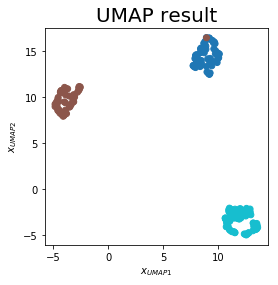

In [9]:
plot_result(train_x_transformed_umap, train_y, model=model_umap)
plt.show()

#### tSNE

In [10]:
from kerasy.ML.decomposition import tSNE

model_tsne = tSNE(
    initial_momentum=0.5, 
    final_momoentum=0.8, 
    eta=500, 
    min_gain=0.1, 
    tol=1e-05, 
    prec_max_iter=50, 
    random_state=seed
)
train_x_transformed_tsne = model_tsne.fit_transform(
    train_x, 
    n_components=2, 
    epochs=epochs, 
    verbose=1
)

Each conditional Gaussian has the same perplexity: 30.0
Mean value of sigma: 0.670
500/500 [####################] 100.00% - 2.412s  KL(P||Q): 0.13418998741311491

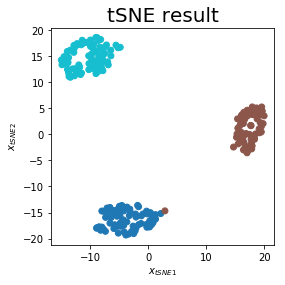

In [11]:
plot_result(train_x_transformed_tsne, train_y, model=model_tsne)
plt.show()

#### Results

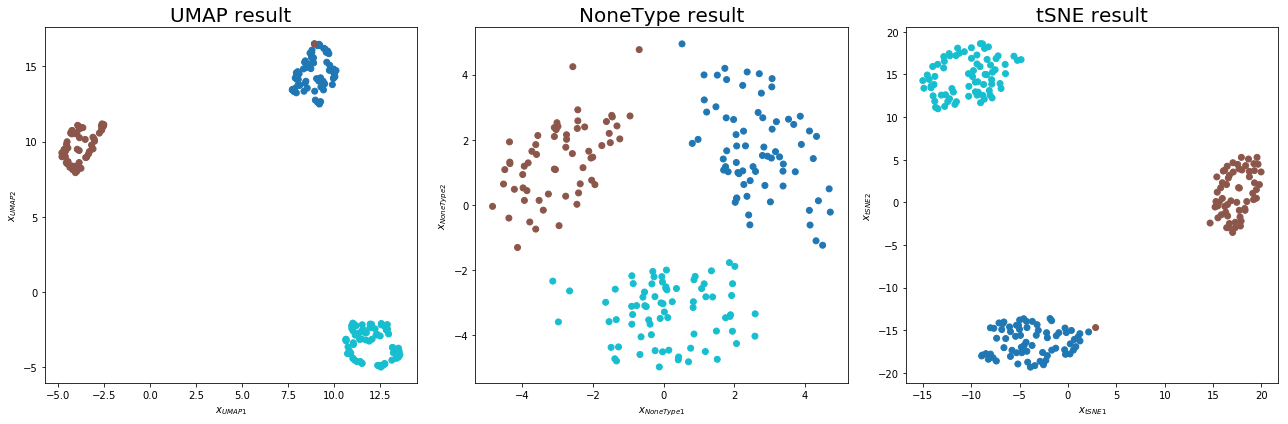

In [12]:
fig, (ax_umap,ax_ori,ax_tsne) = plt.subplots(1,3,figsize=(18,6))

ax_umap = plot_result(train_x_transformed_umap, train_y, model=model_umap, ax=ax_umap)
ax_ori  = plot_result(train_x, train_y, ax=ax_ori)
ax_tsne = plot_result(train_x_transformed_tsne, train_y, model=model_tsne, ax=ax_tsne)

plt.tight_layout()
plt.show()

### data2. MNIST

In [13]:
from kerasy.datasets import mnist 

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
num_mnist = 3000
x_train_mnist = x_train[:num_mnist].reshape(num_mnist, -1)
y_train_mnist = y_train[:num_mnist]

epochs = 600

#### UMAP

In [16]:
from kerasy.ML.decomposition import UMAP

model_mnist_umap = UMAP(
    min_dist=0.1, 
    spread=1.0, 
    sigma_iter=40, 
    sigma_init=1.0, 
    sigma_tol=1e-5,
    sigma_lower=0, 
    sigma_upper=np.inf,
    random_state=seed,
)
x_train_mnist_transformed_umap = model_mnist_umap.fit_transform(
    x_train_mnist, 
    n_components=2, 
    epochs=epochs, 
    init_lr=1, 
    verbose=1
)

600/600 [####################] 100.00% - 527.371s  


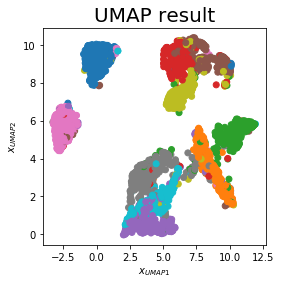

In [17]:
plot_result(x_train_mnist_transformed_umap, y_train_mnist, model=model_mnist_umap)
plt.show()

#### tSNE

In [18]:
from kerasy.ML.decomposition import tSNE

model_mnist_tsne = tSNE(
    initial_momentum=0.5, 
    final_momoentum=0.8, 
    eta=500, 
    min_gain=0.1, 
    tol=1e-05, 
    prec_max_iter=50, 
    random_state=seed
)
x_train_mnist_transformed_tsne = model_mnist_tsne.fit_transform(
    x_train_mnist, 
    n_components=2, 
    epochs=epochs, 
    verbose=1
)

Preprocessing the data using PCA to reduce the dimentions 784→50
Each conditional Gaussian has the same perplexity: 30.0


/Users/iwasakishuto/Github/portfolio/Kerasy/kerasy/utils/metric_utils.py:135: ComplexWarning: Casting complex values to real discards the imaginary part
  X = np.array(X, dtype=dtype_float)
/Users/iwasakishuto/Github/portfolio/Kerasy/kerasy/utils/metric_utils.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  Y = np.array(Y, dtype=dtype_float)
/Users/iwasakishuto/Github/portfolio/Kerasy/kerasy/ML/decomposition.py:139: RuntimeWarning: invalid value encountered in true_divide
  Pi = propto_pji/np.sum(propto_pji) # Pi[j] = p_j|i
/Users/iwasakishuto/Github/portfolio/Kerasy/kerasy/ML/decomposition.py:140: RuntimeWarning: divide by zero encountered in log
  logPerp = np.sum(-Pi*np.log(Pi))
/Users/iwasakishuto/Github/portfolio/Kerasy/kerasy/ML/decomposition.py:140: RuntimeWarning: invalid value encountered in multiply
  logPerp = np.sum(-Pi*np.log(Pi))


Mean value of sigma: 0.001
600/600 [####################] 100.00% - 28481.057s  KL(P||Q): 1.1038501853343383

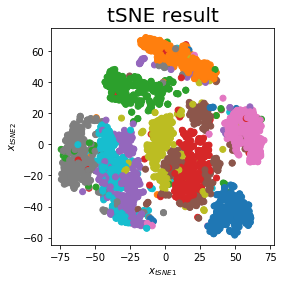

In [19]:
plot_result(x_train_mnist_transformed_tsne, y_train_mnist, model=model_mnist_tsne)
plt.show()

#### Results

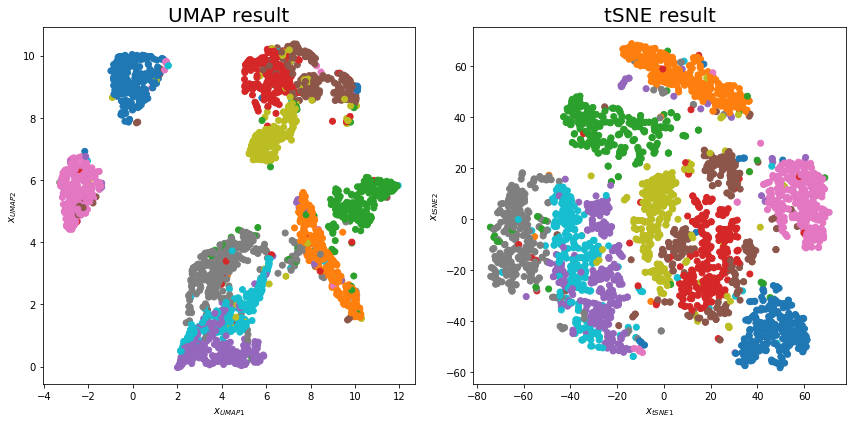

In [20]:
fig, (ax_umap,ax_tsne) = plt.subplots(1,2,figsize=(12,6))

ax_umap = plot_result(x_train_mnist_transformed_umap, y_train_mnist, model=model_mnist_umap, ax=ax_umap)
ax_tsne = plot_result(x_train_mnist_transformed_tsne, y_train_mnist, model=model_mnist_tsne, ax=ax_tsne)

plt.tight_layout()
plt.show()

#### tSNE vs. UMAP

||tSNE|UMAP|
|:-:|:-:|:-:|
||**pure Machine Learning semi-empirical algorithm**|**based on solid mathematical principles**|
||Preserves **Only Local** Structure|Preserves **Global** Structure|
|probability in **high-dimensional space**|$$p_{j|i} = \frac{\exp\left(-\|x_i-x_j\|^2/2\sigma_i^2\right)}{\sum_{k\neq i}\exp\left(-\|x_i-x_k\|^2/2\sigma_i^2\right)}$$|$$p_{i|j} = \exp\left(-\frac{d(x_i,x_j)-\rho_i}{\sigma_i}\right), \quad \rho_i = \min_{j\neq i}\left\{d(x_i,x_j)\right\}$$|
|joint probability in **high-dimensional space**|$$p_{ij}=\frac{p_{i|j}+p_{j|i}}{2N}$$|$$p_{ij} = p_{i|j} + p_{j|i} - p_{i|j}p_{j|i}$$|
||$$\text{Perplexity} = 2^{-\sum_j p_{j|i}\log_2p_{j|i}}$$|**number of nearest neighbors**$$k = 2^{\sum_jp_{i|j}}$$|
|probability in **low-dimensional space**|$$q_{ij}=\frac{\left(1 + \|y_i-y_j\|^2\right)^{-1}}{\sum_{k\neq i}\left(1 + \|y_i-y_k\|^2\right)^{-1}}$$|$$q_{ij} = \left(1 + a(y_i-y_j)^{2b}\right)^{-1}$$|
|loss function|$\mathrm{KL}(P_i\|Q_i) = \sum_i\sum_jp_{j|i}\log\frac{p_{j|i}}{q_{j|i}}$|$$\mathrm{CE}(X,Y) = \sum_i\sum_j\left[p_{ij}(X)\log\left(\frac{p_{ij}(X)}{q_{ij}(Y)}\right) + \left(1-p_{ij}(X)\right)\log\left(\frac{1-p_{ij}(X)}{1-q_{ij}(Y)}\right)\right]$$|
|Optimization|**Gradient Descent**|**Stochastic Gradient Descent**|
|Gradients|$$\frac{\partial\mathrm{KL}}{\partial y_i} = 4\sum_j(p_{ij}-q_{ij})(y_i-y_j)\left(1 + \|y_i-y_j\|^2\right)^{-1}$$|$$\frac{\partial\mathrm{CE}}{\partial y_i} = \sum_j\left[\frac{2abd_{ij}^{2(b-1)}P(X)}{1 + ad_{ij}^{2b}}-\frac{2b(1-P(X))}{d_{ij}^2\left(1 + ad_{ij}^{2b}\right)}\right](y_i-y_j)$$|
|Initial low-dimensional coordinates|**Random Normal Initialization**|**Graph Laplacian**|